In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# https://towardsdatascience.com/financial-data-analysis-bf4b5e78c45c
# https://towardsdatascience.com/financial-data-analysis-51e7275d0ae

In [39]:
df = pd.read_csv('titanic_train.csv')

Find column columns

In [40]:
print(list(df.columns))

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [41]:
df.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [42]:
# 53 attributes has been removed 
df.shape

(891, 12)

In [43]:
#  df.drop(duplicate_cols, axis = 1, inplace = True)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [44]:
features_to_be_removed =[]
features_to_be_removed.extend(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare'])
df.drop(features_to_be_removed, axis = 1, inplace = True)
 

In [45]:
df.shape

(891, 7)

In [46]:
def plot_feature(col_name, isContinuous):
    """
    Visualize a variable with and without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # Plot without loan status
    if isContinuous:
        sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(col_name)
    ax1.set_ylabel('Count')
    ax1.set_title(col_name)
    plt.xticks(rotation = 90)
# Plot with loan status
    if isContinuous:
        sns.boxplot(x=col_name, y='Survived', data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(col_name + ' by Survival Status')
    else:
        data = df.groupby(col_name)['Survived'].value_counts(normalize=True).to_frame('proportion').reset_index()        
        sns.barplot(x = col_name, y = 'proportion', hue= "loan_status", data = data, saturation=1, ax=ax2)
        ax2.set_ylabel('Survival fraction')
        ax2.set_title('Survival status')
        plt.xticks(rotation = 90)
    ax2.set_xlabel(col_name)
    
    plt.tight_layout()


In [47]:
df.iloc[0:5, 0: 10]

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S


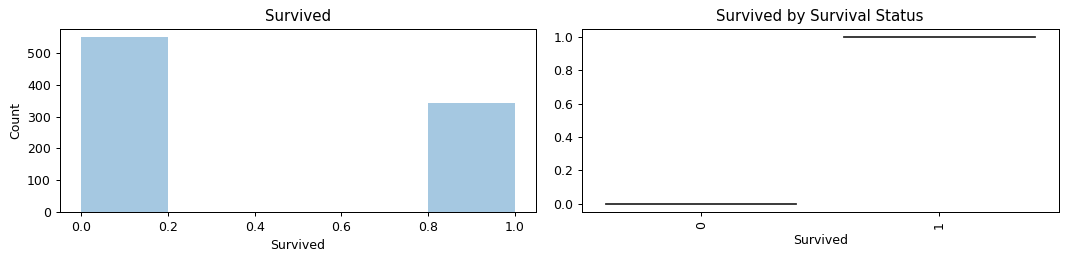

In [48]:
len(df.Survived.value_counts())
plot_feature('Survived', True)

In [49]:
df_selected = df.dropna()
df_selected.to_csv('df_selected_titanic.csv', index = False)

In [50]:
import seaborn as sns
import pandas as pd
from sklearn.utils import shuffle, class_weight
from sklearn import preprocessing,  tree, metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

In [51]:
df_selected = pd.read_csv('df_selected_titanic.csv')
df_selected= df_selected.dropna()

In [52]:

df_selected.shape

(712, 7)

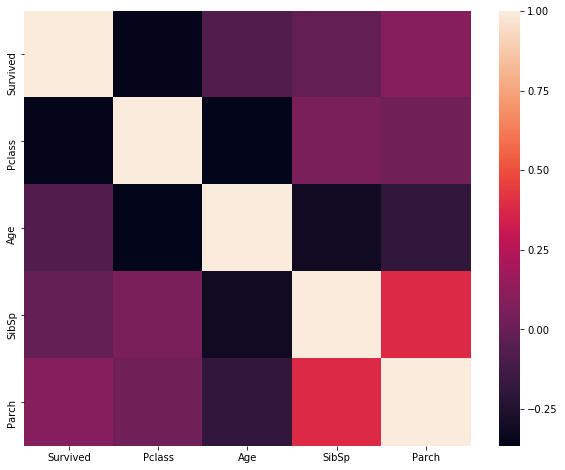

In [53]:
corr = df_selected.corr()
plt.figure(figsize = (10, 8))
sns.heatmap(corr)
plt.show()

In [54]:
y= df_selected.Survived
X = df_selected.drop("Survived", axis = 1)
X = pd.get_dummies(X)


In [55]:
X_train, X_test, y_train, y_test=train_test_split(X, y, 
                                                  test_size = 0.05,
                                                  random_state = 123)

In [56]:
clf = RandomForestClassifier(n_estimators=500,criterion = 'entropy', max_depth=5,random_state=123)
clf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [57]:
y_pred = clf.predict(X_test)
pred_proba = clf.predict_proba(X_test)

In [58]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))


Accuracy: 0.8055555555555556


Text(91.68,0.5,'predicted values')

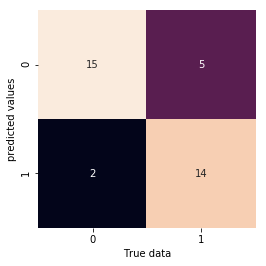

In [59]:
from sklearn.metrics import confusion_matrix
y_true = y_test.tolist()
mat = confusion_matrix(y_true,y_pred)
sns.heatmap(mat.T, square =True, annot = True, fmt = 'd', cbar= False)
plt.xlabel('True data')
plt.ylabel('predicted values')

In [60]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
estimator = clf.estimators_[10]
export_graphviz(estimator, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=X_train.columns,class_names = ['no', 'yes'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  


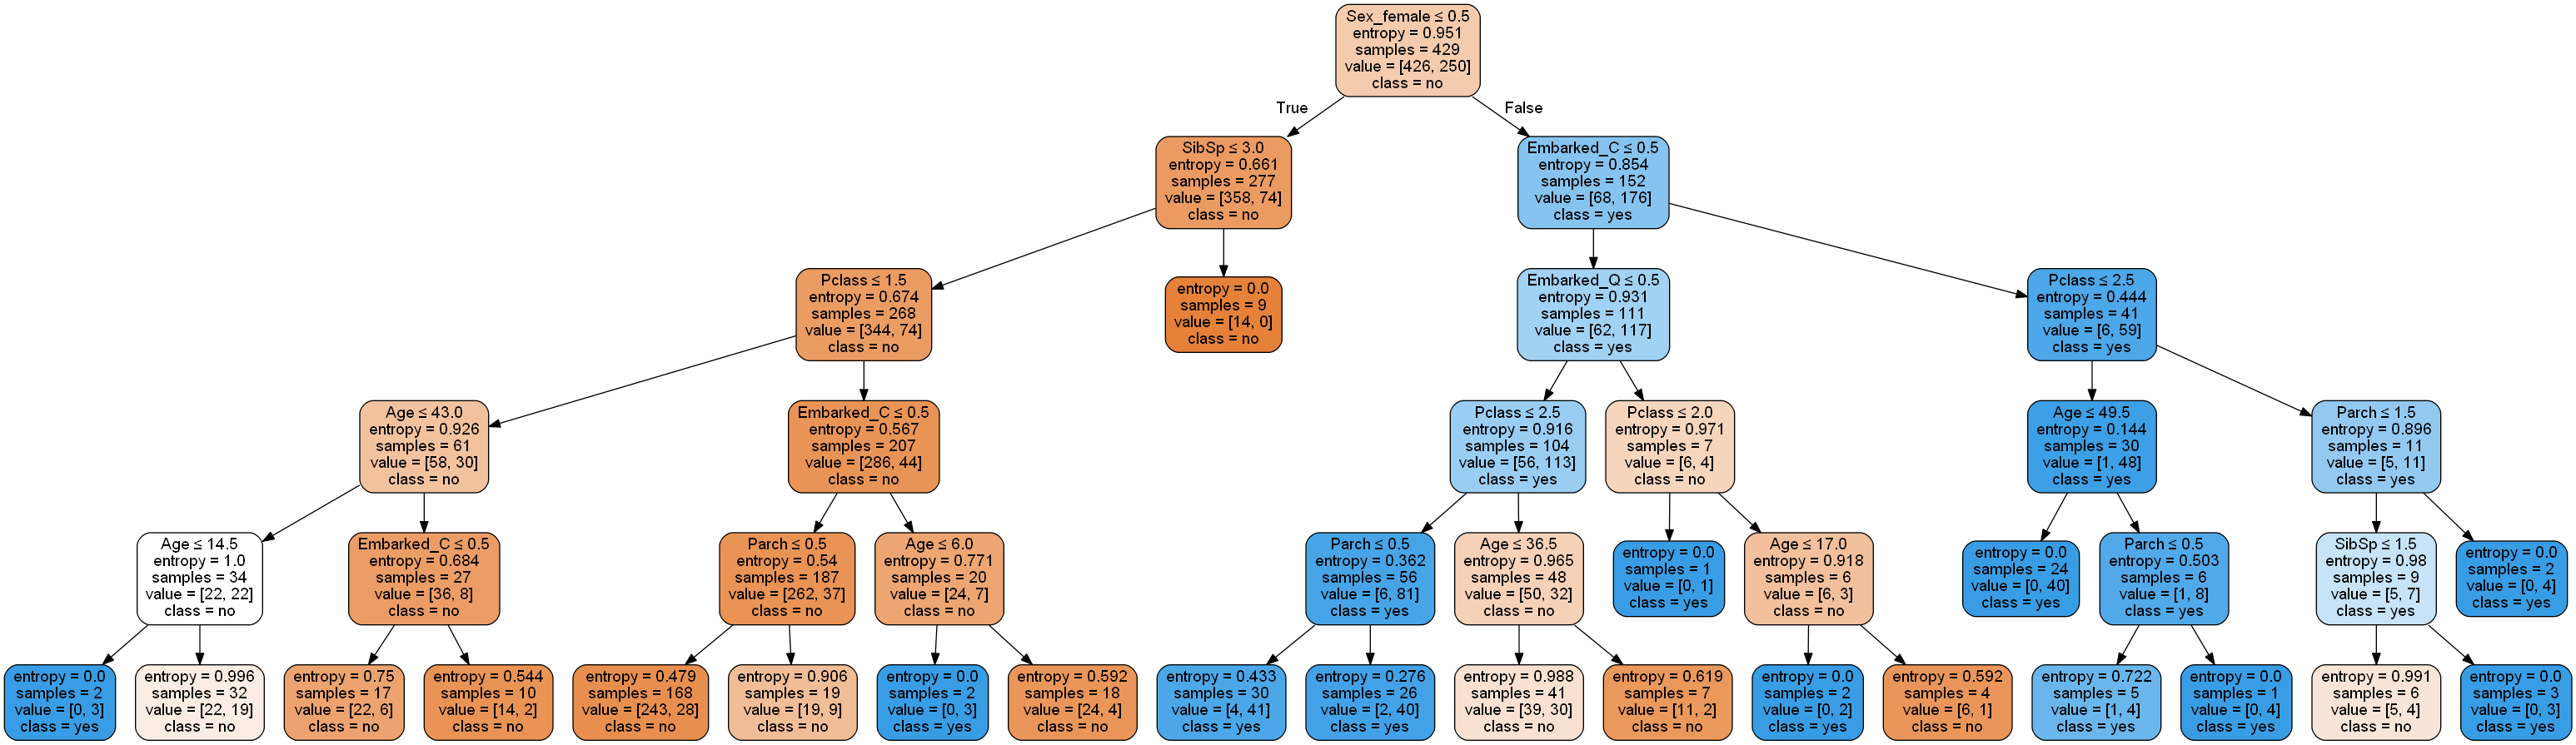

In [61]:
Image(graph.create_png())

In [62]:
feature_importances = pd.Series(clf.feature_importances_, index = X.columns )

feature_importances.columns = ['columns','imp']

feature_importances = feature_importances.sort_values()
feature_importances = feature_importances[lambda x: x>0.01]



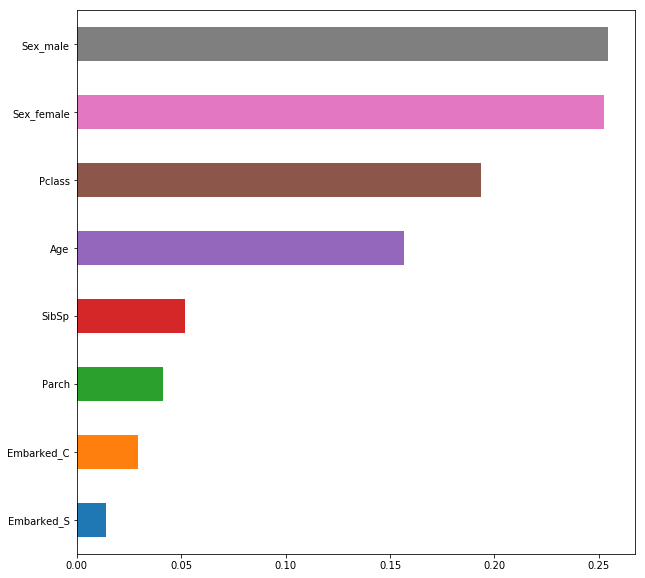

In [63]:

feature_importances.plot(kind='barh', figsize = (10,10))


In [64]:
y_pred

array([0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0], dtype=int64)